<img src="./logo_UNSAM.jpg" align="right" width="150" />

# Trabajo Práctico 1 
**Carola Piazze Vicini**


## Introducción
El objetivo de este trabajo fue generar y analizar distintas señales a partir de una senoidal base. A esta se le aplicaron distintas transformacones como amplificación, desfase, modulación en amplitud y recorte (clipping). También se construyeron señales cuadradas y pulsos rectangulares. Se verificó la ortogonalidad entre señales, se graficaron correlaciones y se comprobó una identidad trigonométrica mediante código.
#### Teorema de Nyquist–Shannon
Al trabajar con señales digitales, no alcanza con “dibujar” la senoidal: hace falta decidir cada cuánto la vamos a muestrear, es decir, qué **frecuencia de muestreo** usar (fs).
El teorema de Nyquist–Shannon dice que la frecuencia de muestreo tiene que ser por lo menos el doble de la frecuencia máxima de la señal:

$$
f_s \geq 2 f_{max}
$$

donde $f_{max}$ es la frecuencia más alta presente en la señal.

Si se cumple esa condición, la señal muestreada conserva la información suficiente como para poder reconstruirla sin problemas. Si no se cumple, pasa lo que se llama aliasing: en lugar de ver la frecuencia real, el sistema interpreta otra más baja que no corresponde. Es decir que la señal “se disfraza” y ya no se parece a la original. En este trabajo el teorema de Nyquist se tuvo en cuenta, y se eligieron frecuencias de muestreo que lo verifican ampliamente para asegurar la prolijidad y autenticidad de los gráficos.

### Potencia y Energía
**Energía (E)**: Se utiliza para caracterizar señales **transitorias** o de duración finita (por ejemplo un pulso). Se define en tiempo discreto como:

$$
E = \sum_{n=-\infty}^{\infty} |x[n]|^2
$$

**Potencia Promedio (P)**: Se utiliza para señales **periódicas** o de duración infinita (como una senoidal). Expresa la energía cuantificada por unidad de tiempo. En tiempo discreto, para una señal periódica de período $N$, se define como:

$$
P = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2
$$

En este trabajo, se calculará la potencia para las señales periódicas (senoidales, cuadradas) y la energía para la señal finita (el pulso rectangular).
### Operaciones sobre señales
Se realizaron las siguientes operaciones:  

**Amplificación y desfase**  
La amplificación modifica la amplitud de la señal, mientras que el desfase consiste en desplazarla en el tiempo (eje horizontal) sin cambiar su forma. Se consigue sumando una constante a la fase de la senoidal.  

**Modulación en amplitud (AM)**  
Hacer variar la amplitud de una senoidal principal (portadora) en función de otra señal de menor frecuencia (moduladora).  

**Clipping**  
Consiste en limitar (o recortar) la amplitud de una señal. Cuando esta supera un cierto valor positivo o negativo, se aplana.  


### Ortogonalidad
Dos señales **x** e **y** discretas son ortogonales si su producto interno es cero.
$$
\langle x, y \rangle = \sum_{n} x[n] \cdot y[n] \approx 0
$$

En la práctica es necesario tener en cuenta la impresición computacional, por lo que dos señales se consideran ortogonales si su producto es aproximadamente cero, es decir si el módulo está por debajo de una tolerancia definida. 

### Correlación cruzada y autocorrelación
La correlación cruzada consiste en en medir la semejanza entre dos señales distintas a medida que una se desplaza respecto a la otra. Si la correlación es alta para un determinado desplazamiento $\tau$, significa que comparten una componente similar en ese instante. Para señales de energía finita en tiempo discreto:

$$
R_{xy}[k] = \sum_{n=-\infty}^{\infty} x[n]\,y[n+k]
$$
La autocorrelación es un caso particular de la correlación cruzada, donde se mide la similitud de una señal consigo misma. 

$$
R_{xx}[k] = \sum_{n=-\infty}^{\infty} x[n]\,x[n+k]
$$


Potencia/energía de señales
Señal x1 (seno 2 kHz): Potencia = 0.500000
Señal x2 (A=2, desfase pi/2): Potencia = 2.000000
Señal x3 (AM 2 kHz modulada por 1 kHz): Potencia = 0.660000
Señal x1_clipped (75% amplitud): Potencia = 0.370064
Señal cuadrada 4 kHz: Potencia = 1.000000
Pulso rectangular 10 ms: Energía = 0.010000


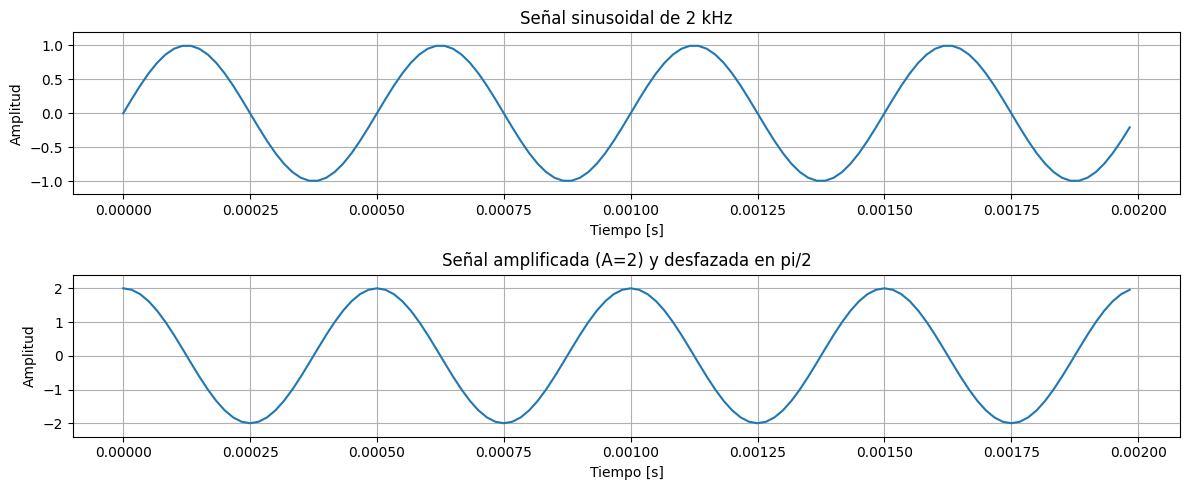

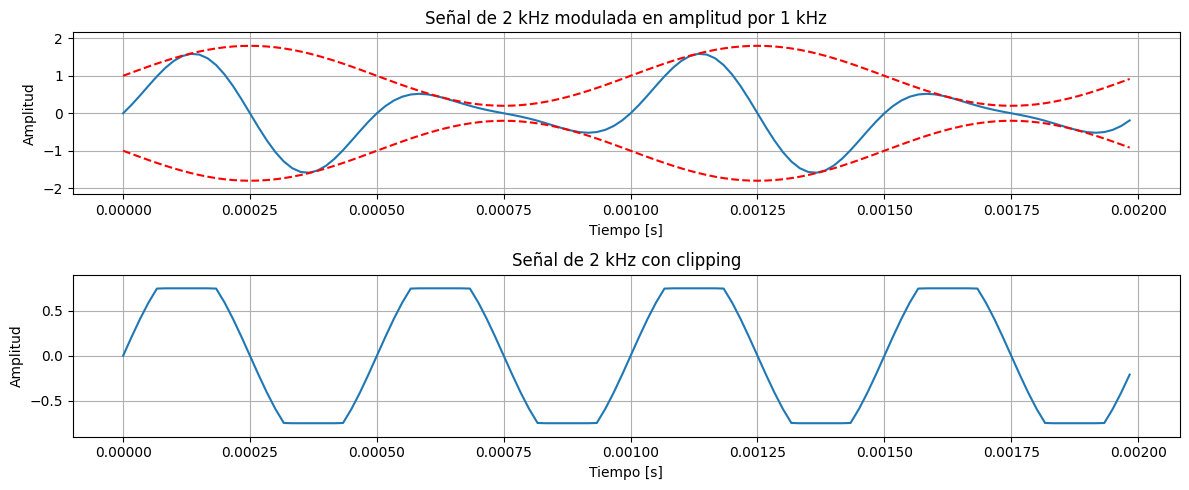

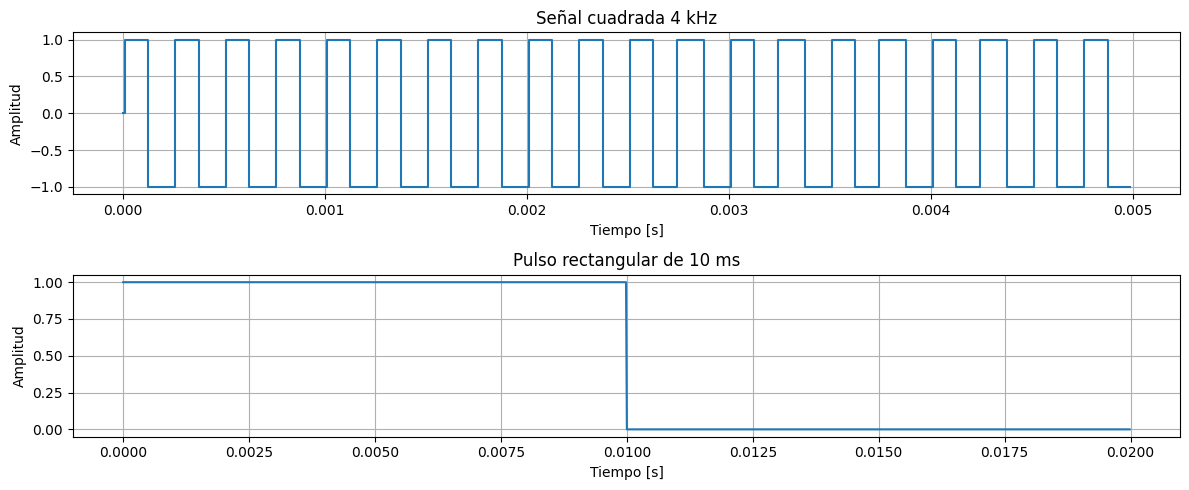

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# defino parámetros
fs = 60000  # Frecuencia de muestreo [Hz]
t_seno = np.linspace(0, 0.002, int(fs * 0.002), endpoint=False)  # para x1,x2,x3
# vector de tiempo de 0 a 2 milisegundos, con fs puntos igualmente espaciados
t_cuadrada = np.linspace(0, 0.005, int(fs * 0.005), endpoint=False)  # para señal cuadrada
tpulso = np.linspace(0, 0.02, int(fs * 0.02), endpoint=False)  # para pulso rectangular



frec = 2000  # frecuencia en Hz de la señal principal

#defino las ecuaciones de energía y potencia, después las voy a calcular y printear para cada función según corresponda
def calc_potencia(x): #(para periódicas)
    return np.mean(x**2)

def calc_energia(x, Ts): #(para finitas)
    return np.sum(x**2) * Ts

Ts = 1/fs  # tiempo entre muestras

# Señal sinusoidal de 2 kHz
x1 = np.sin(2 * np.pi * frec * t_seno)

# La misma señal con desfase de pi/2 y amplificada (A=2)
x2 = 2 * np.sin(2 * np.pi * frec * t_seno + np.pi / 2)

# Misma señal pero modulada en amplitud por otra de la mitad de frecuencia
frecmoduladora = 1000  # señal moduladora
m = 0.8  # índice de modulación (0 < m <= 1)
x3 = (1 + m * np.sin(2 * np.pi * frecmoduladora * t_seno)) * np.sin(2 * np.pi * frec * t_seno)
# El +1 asegura que la envolvente siempre sea >= 0 y no invierta la fase 180°

# Clipping al 75% de la amplitud
A = np.max(np.abs(x1))   # encuentro valor máximo de la amplitud original
A_clip = 0.75 * A        # 75% de esa amplitud
x1_clipped = np.clip(x1, -A_clip, A_clip)  # recorto a ±A_clip

#señal cuadrada
frec_cuadrada=4000
amp = 1    
x_cuadrada = amp * np.sign(np.sin(2 * np.pi * frec_cuadrada * t_cuadrada))

#para el pulso rectangular defino un tiempo más largo para que entre, porque si uso el que ya tenía definido se ve como el pulso de un muerto
pulso=0.01
x_rectangular=np.where(tpulso < pulso, 1, 0)  # vale 1 de 0 a 10 ms, 0 después


print("Potencia/energía de señales")

P_x1 = calc_potencia(x1)
print(f"Señal x1 (seno 2 kHz): Potencia = {P_x1:.6f}")

P_x2 = calc_potencia(x2)
print(f"Señal x2 (A=2, desfase pi/2): Potencia = {P_x2:.6f}")

P_x3 = calc_potencia(x3)
print(f"Señal x3 (AM 2 kHz modulada por 1 kHz): Potencia = {P_x3:.6f}")

P_x1_clipped = calc_potencia(x1_clipped)
print(f"Señal x1_clipped (75% amplitud): Potencia = {P_x1_clipped:.6f}")

P_x_cuadrada = calc_potencia(x_cuadrada)
print(f"Señal cuadrada 4 kHz: Potencia = {P_x_cuadrada:.6f}")

E_x_rect = calc_energia(x_rectangular, Ts)
print(f"Pulso rectangular 10 ms: Energía = {E_x_rect:.6f}")

#gráficos de señal normal y señal desfasada
plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.plot(t_seno, x1)
plt.title("Señal sinusoidal de 2 kHz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.margins(y=0.1)

plt.subplot(2, 1, 2)
plt.plot(t_seno, x2)
plt.title("Señal amplificada (A=2) y desfazada en pi/2")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.margins(y=0.1)

plt.tight_layout()
plt.show()

# segunda figura con modulada y recortada
plt.figure(figsize=(12, 5))

plt.subplot(2, 1, 1)
plt.plot(t_seno, x3)
plt.title("Señal de 2 kHz modulada en amplitud por 1 kHz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.margins(y=0.1)

# Dibujo la envolvente
envolvente_superior = 1 + m * np.sin(2 * np.pi * frecmoduladora * t_seno)
envolvente_inferior = -(1 + m * np.sin(2 * np.pi * frecmoduladora * t_seno))
plt.plot(t_seno, envolvente_superior, 'r--')
plt.plot(t_seno, envolvente_inferior, 'r--')

plt.subplot(2, 1, 2)
plt.plot(t_seno, x1_clipped)
plt.title("Señal de 2 kHz con clipping")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.margins(y=0.1)

plt.tight_layout()
plt.show()

#ploteo señal cuadrada (periódica) y pulso rectangular

plt.figure(figsize=(12,5))

plt.subplot(2,1,1)
plt.step(t_cuadrada, señal_cuadrada, where='mid')  # usando step para que se vea cuadrada
plt.title("Señal cuadrada 4 kHz")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(tpulso, x_rectangular)
plt.title("Pulso rectangular de 10 ms")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()



Ortogonalidad entre x1 y las demás señales
x1 · x2 = -0.000000 -> Es ortogonal
x1 · x3 = 60.000000 -> No es ortogonal
x1 · x1_clipped = 51.257102 -> No es ortogonal
x1 · x_cuadrada = 0.000000 -> Es ortogonal


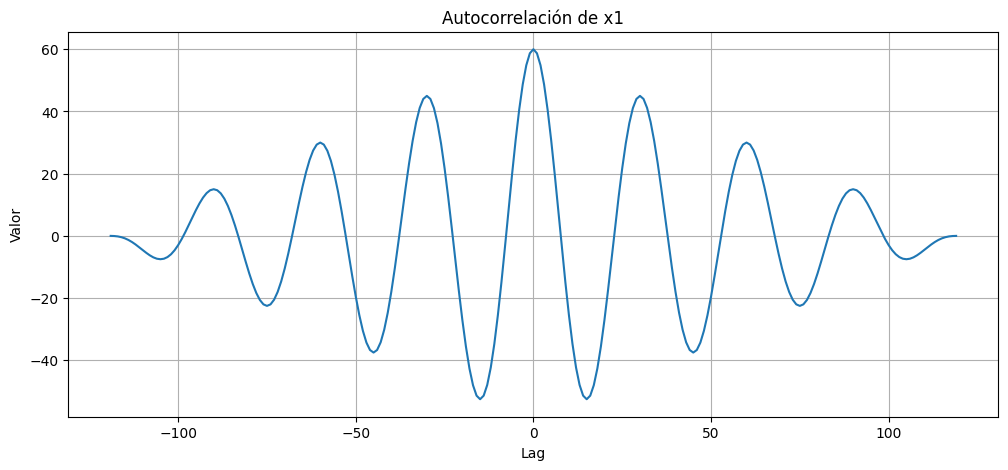

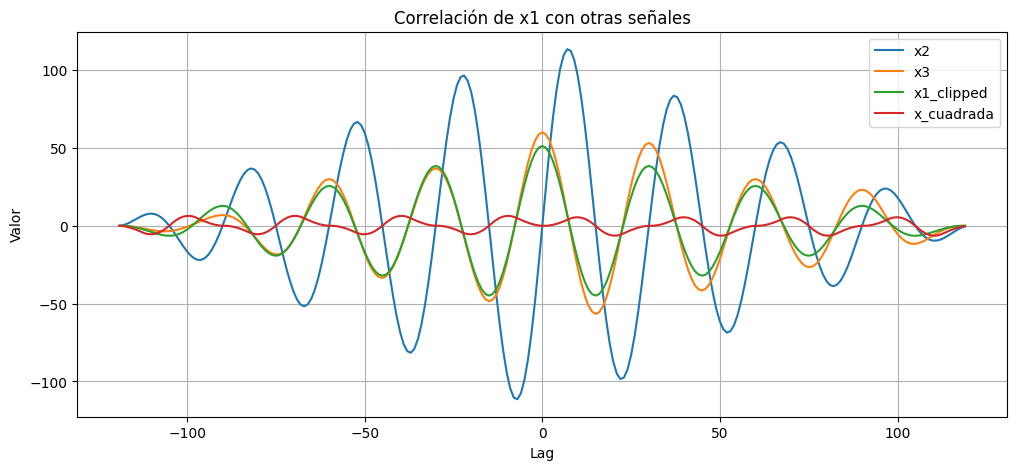

se cumple la identidad


In [24]:
import numpy as np
import matplotlib.pyplot as plt

señales = {
    "x2": x2,
    "x3": x3,
    "x1_clipped": x1_clipped,
    "x_cuadrada": x_cuadrada[:len(t_seno)]  # recorto al largo de x1

}

print("Ortogonalidad entre x1 y las demás señales")
for nombre, sig in señales.items():
    sig_recortada = sig[:len(x1)]
     #recortar es muy importante porque necesito agarrar un cacho de señal que sea
    #igual al pedazo con el que estoy haciendo la correlación o el producto (que en este caso es la senoidal x1)
    producto = np.dot(x1, sig_recortada)
    #esto es necesario porque la función np.dot requiere vectires de igual longitud para calcular el producto interno
    
    if np.isclose(producto, 0, atol=1e-6):
        resultado = "Es ortogonal"
    else:
        resultado = "No es ortogonal"
    print("x1 ·", nombre, "=", f"{producto:.6f}", "->", resultado)

    # autocorrelación de x1
auto_x1 = np.correlate(x1, x1, mode='full')

# correlación de x1 con otras señales
correlaciones = {}
for nombre, sig in señales.items():
    sig_recortada = sig[:len(x1)]  # recortamos si es necesario
    correl = np.correlate(x1, sig_recortada, mode='full')
    correlaciones[nombre] = correl

lags = np.arange(-len(x1)+1, len(x1))  # vector de desplazamientos para el eje x

# autocorrelación
plt.figure(figsize=(12, 5))
plt.plot(lags, auto_x1)
plt.title("Autocorrelación de x1")
plt.xlabel("Lag")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

# correlación con otras señales
plt.figure(figsize=(12, 5))
for nombre, correl in correlaciones.items():
    plt.plot(lags, correl, label=nombre)
plt.title("Correlación de x1 con otras señales")
plt.xlabel("Lag")
plt.ylabel("Valor")
plt.grid(True)
plt.legend()
plt.show()

frecuencia = 350  
w = 2 * np.pi * frecuencia
duracion = 0.01  
frec_muestreo = 40000
cant_muestras = int(duracion * frec_muestreo)

N = 500
t_ecuacion = np.linspace(0, duracion, N, endpoint=False)

alfa = w * t_ecuacion
beta = 2 * alfa
izquierda= 2 * np.sin(alfa) * np.sin(beta)
derecha = np.cos(alfa - beta) - np.cos(alfa + beta)

# Verificar la igualdad (con tolerancia para errores numéricos)
if np.allclose(izquierda, derecha, atol=1e-10):
    print("se cumple la identidad")
else:
    print("no se cumple")


## Desarrollo y análisis
La frecuencia de muestreo establecida de 60kHz fue fija para todas las señales, algo grande pero aseguró prilojodad, y que se cumpliera el teorema de Nyquist ampliamente. Por otro lado y con el fin de que cada gráfico se viera correctamente, se definieron tres vectores de tiempo distintos, uno para las señales senoidales (2kHz, amplificada y desfazada, modulada), otro para la señal cuadrada y otro para el pulso rectangular.
Se codearon en python todas las señales correspondientes utilizando funciones numpy dentro de lo posible, a excepción de la señal cuadrada porque al intentar usar np.square la representación era muy extraña,y luego de intentar arreglarlo y fallar varias veces, chatgpt sugirió la forma utilizada, con lo que se lograron resultados considerablemente mejores. 
Las otras se observaron acorde a lo planeado: 
**Señal sinusoidal de 2 kHz (x1):** Se generó como referencia base, mostrando el comportamiento periódico esperado. Su potencia calculada fue de aproximadamente 0.5, el valor teórico para una senoidal con A=1.

**Señal amplificada y desfasada (x2):** Al aplicar un desfase de $\pi/2$ radianes y amplificar por 2, se observa el desplazamiento temporal característico en los cruces por cero. La potencia se cuadruplicó respecto a x1, respetando el factor de amplificación al cuadrado.

**Señal modulada en amplitud (x3):** Utilizando una portadora de 2 kHz y moduladora de 1 kHz con índice $m=0.8$, se obtuvo correctamente una envolvente variable en el tiempo. La potencia resultante refleja la contribución de ambas componentes. 

**Señal recortada (x1_clipped):** El clipping al 75% de amplitud produce un gráfico en el que se puede ver el aplanamiento característico en los picos de la senoidal. Se observó que este recorte disminuye la potencia respecto a aquella de la señal original.

**Señal cuadrada de 4 kHz (x_cuadrada):** Generada mediante la función signo, presenta un comportamiento discontinuo con transiciones abruptas, justamente porque np.sign devuelve 1 si x>0, 0 si x=0 y -1 si x<0, por lo que cuando se aplica a una senoidal la señal alterna entre 1 y -1 sin valores intermedios. Su potencia es igual a 1, lo cual corresponde al valor teórico esperado de una onda cuadrada con A=1.

**Pulso rectangular de 10 ms (x_rectangular)** Como es un pulso finito, se calculó su energía total en lugar de potencia. El valor obtenido refleja adecuadamente la duración y amplitud de la señal.

### Análisis de ortogonalidad 
Para verificar la ortogonalidad entre x1 y el resto de las señales, fue crucial hacer el recorte para que todas coincidieran en 120 muestras, de otra manera no hubiera sido posible usar la funcion *np.dot*. 
Los resultados observados fueron coherentes con lo esperado:
- x2 está desfasada 90° respecto a x1, por lo que al multiplicarlas y sumarlas los valores positivos y negativos formal ciclos completos y se cancelan, por ende **son ortogonales**.
- en la señal x3, la envolvente moduladora varía lentamente mientras que la portadora sigue la misma frecuencia de x1, por lo que parte de x3 coincide con x1 y la otra parte se promedia a cero. Por consecuencia el producto interno es distinto de cero, **no son ortogonales**
- x1_clipped, aún estando recortada en amplitud, mantiene la similitud con la onda x1 original, por lo que los valores no se cancelan y **no son ortogonales**.
- x_cuadrada tiene armónicos distintos a x1 y la ventana de análisis cubre un número entero de ciclos, por lo que al multiplicar y sumar los valores positivos se cancelan casi por completo, el resultado es aproximadamente ortogonal.

### Análisis de correlación y autocorrelación
Como menciona la introducción, la correlación cruzada mie cuanto se parece una señal con otra al desplazarla. Gráficamente, un pico alto indica gran similitud en ese desplazamiento (lag), un valor cercano a cero indica poca similitud.
Si tenemos esto en cuenta y observamos el gráfico, se puede ver como la x2 es la más parecida a x1, y luego se van haciendo cada vez menos similares en orden de aparición.

Respecto a la identidad trigonométrica no tengo muchos comentarios, creo que el código está bien escrito y el resultado fue coherente.

## Conclusiones y aprendizajes
En este trabajo se generaron y analizaron distintas señales a partir de una senoidal base, aplicando transformaciones como amplificación, desfase, modulación en amplitud y clipping, así como construyendo señales cuadradas y pulsos rectangulares. Se verificó la ortogonalidad entre señales y se graficaron correlaciones y autocorrelaciones, observando que las señales con fases o frecuencias distintas resultan ortogonales, mientras que aquellas que comparten componentes no lo son. La aplicación del teorema de Nyquist–Shannon garantizó que las señales muestreadas conservaran su información original, evitando aliasing. Además, los cálculos de potencia y energía permitieron caracterizar adecuadamente tanto señales periódicas como transitorias.
Este trabajo también me sirvió para empezar a familiarizarme con las herramientas de programación y visualización que vamos a usar a lo largo de la materia, que al principio me resultaban bastante nuevas. Si bien tuve que acudir a ChatGPT para alguna sintaxis en Python, y también en Jupyter (por ejemplo me explicó como formatear las fórmulas para que se lean bien), considero que entendí el trabajo correctamente, y mejoré en el uso de las herramientas.

PD.: Algo que no pude formatear correctamente fue lo de justificar el texto, lo que me sugiere chat solo funciona para segmentos cortos, si alguien me puede tirar una punta se aprecia! 

**Respuesta a las preguntas del template:**
No resolví la tarea con demasiada seguridad, pero al hacerla respondí dudas, y entendí mejor cosas que en clase no me habían quedado claras.
Entendí bastante bien el concepto de correlación y autocorrelación al verlo con el gráfico. Aprendí varias cosas de python y las funciones de numpy.
Usé ChatGPT y a veces Deepseek para el código cuando desconocía la sintaxis, cuando algo no corría o cuando algo no me salía después de intentar un par de veces. No lo usé para el texto, a excepción de lo mencionado en la conclusión respecto a como formatear las fórmulas para que se vean bien en Markdown. 


